In [1]:
from pdf2image import convert_from_path
import pytesseract
import cv2
import numpy as np
from PIL import Image

In [2]:
doc = convert_from_path("OCR_SAMPLE.pdf",dpi=300)

In [3]:
type(doc)

list

In [4]:
doc=doc[0]

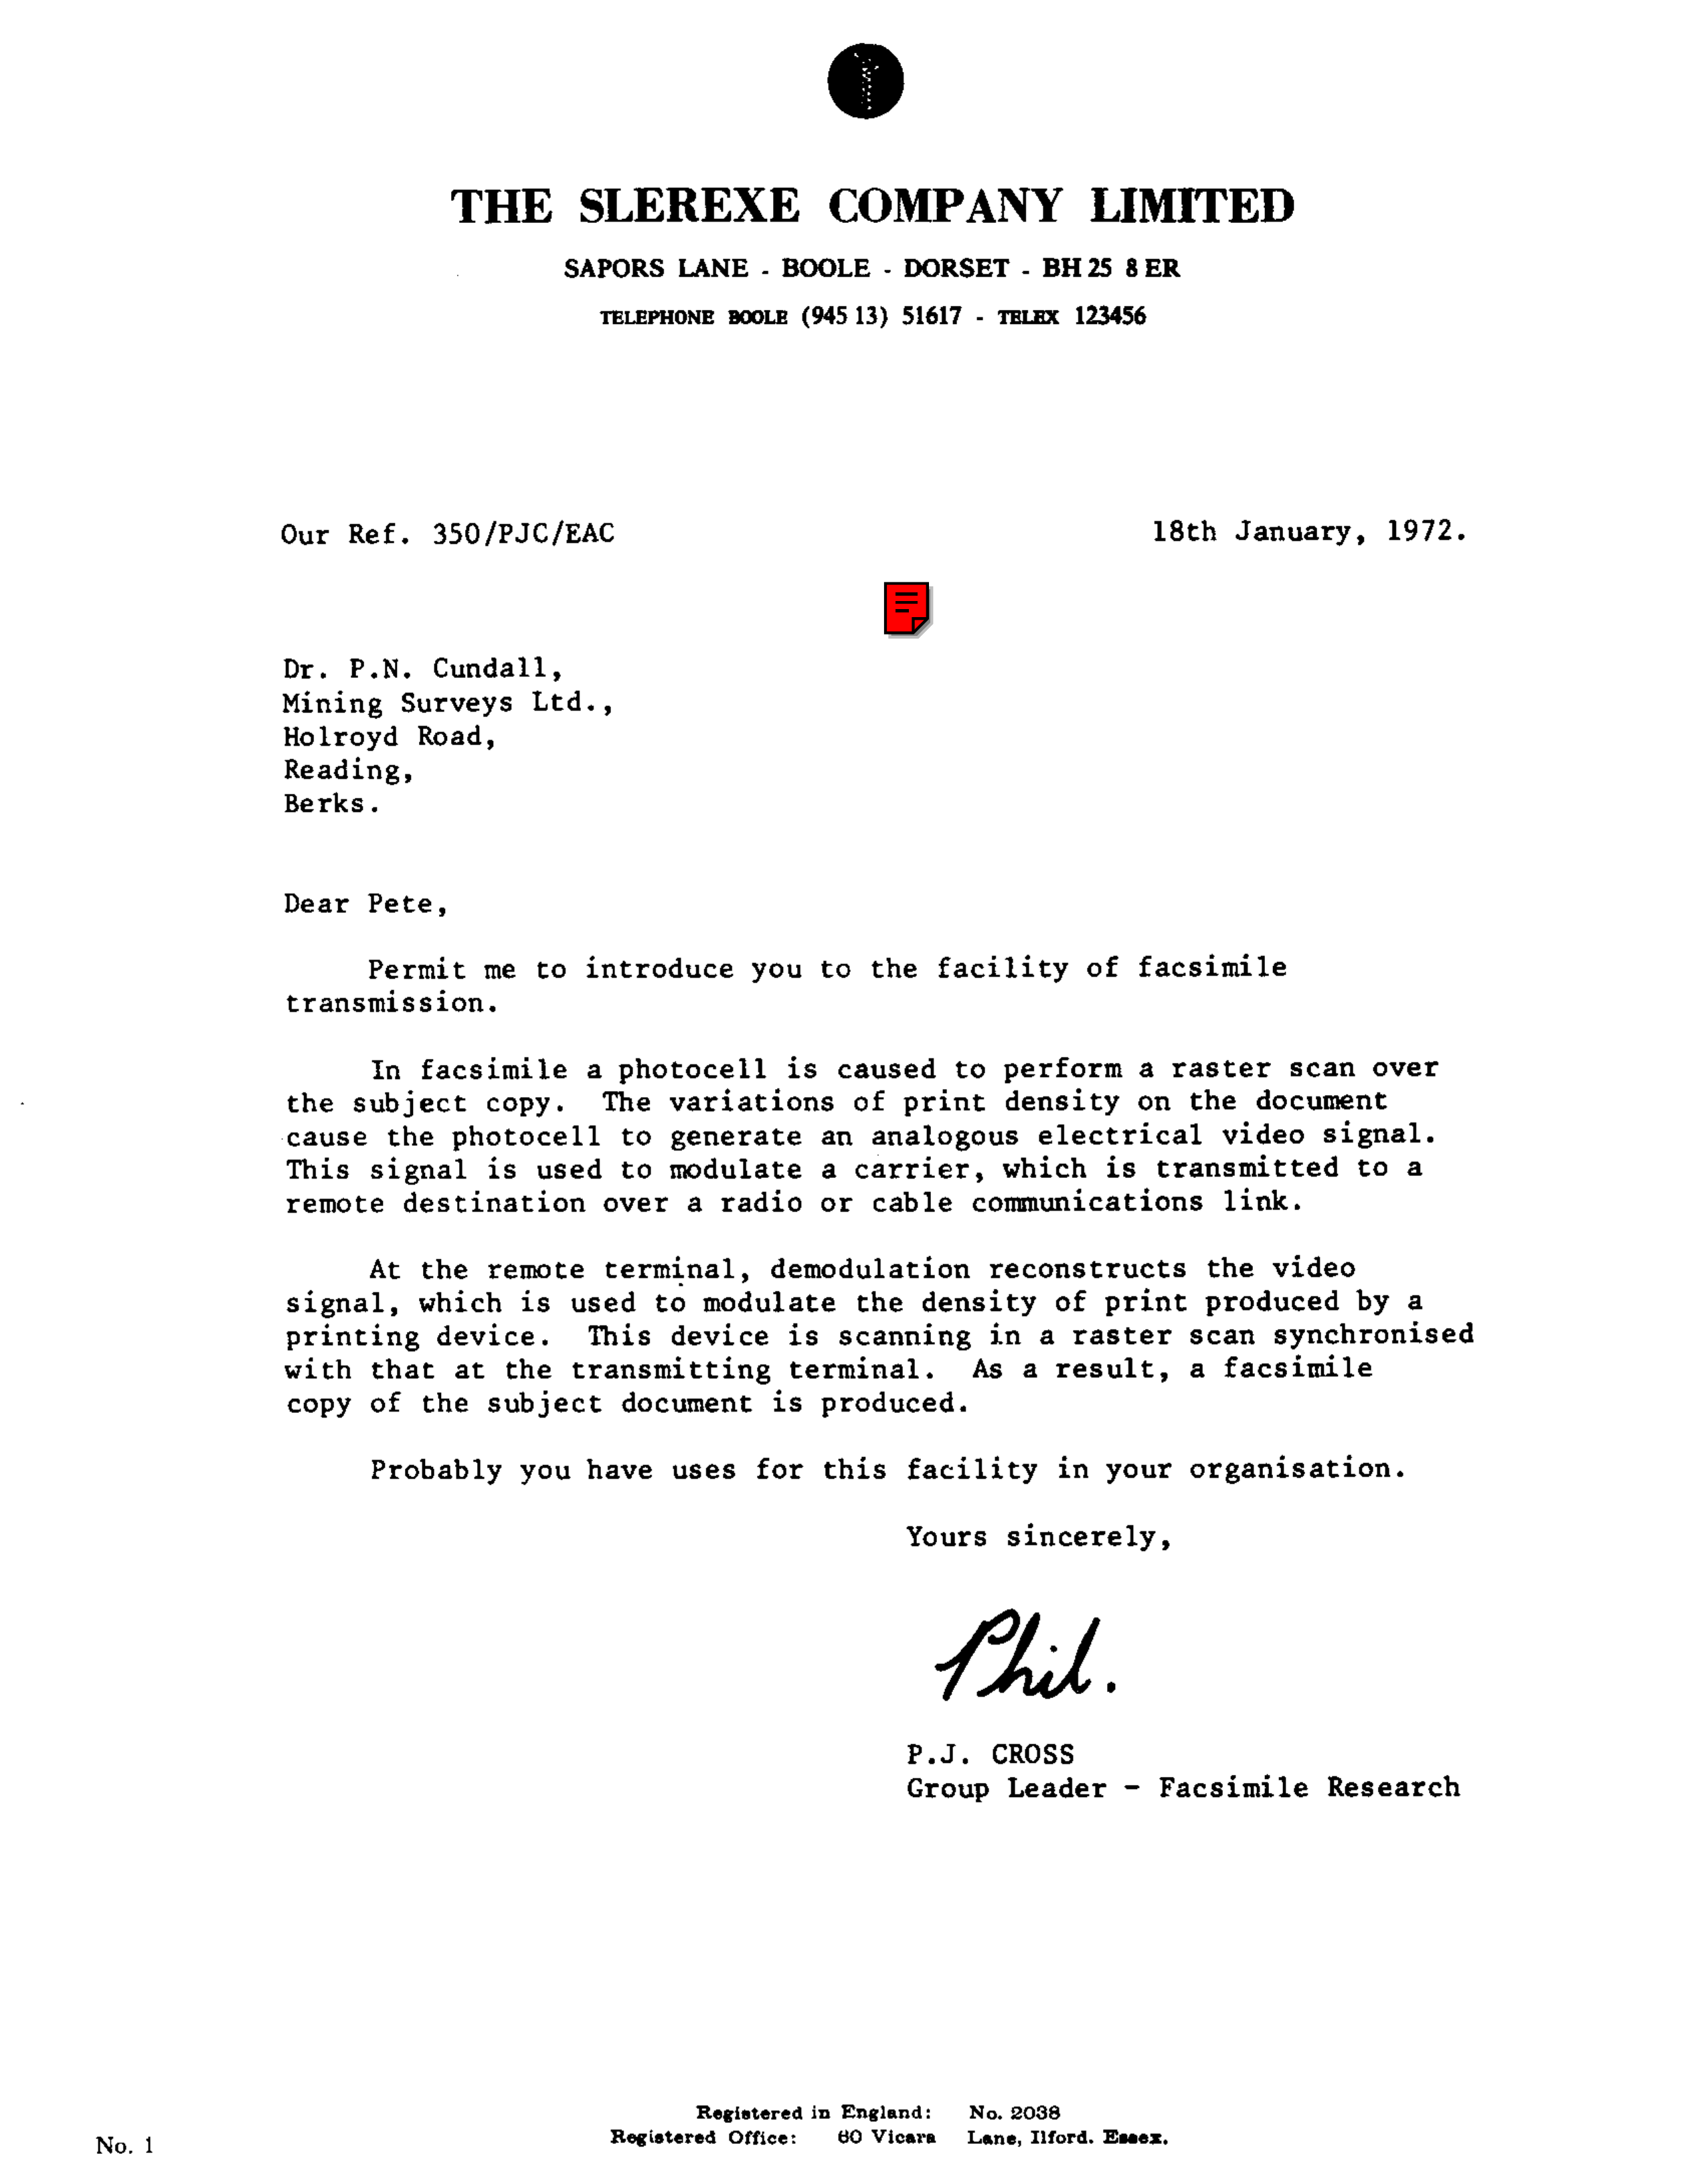

In [5]:
doc

In [6]:
text=pytesseract.image_to_string(doc)
print(text)

No.

THE SLEREXE COMPANY LIMITED

SAPORS LANE - BOOLE - DORSET - BH 25 8ER
TELEPHONE BOOLE (945 13) 51617 - TELEX 123456

Our Ref. 350/PJC/EAC 18th January, 1972.

Dr. P.N. Cundall,
Mining Surveys Ltd.,
Holroyd Road,
Reading,

Berks.

Dear Pete,

Permit me to introduce you to the facility of facsimile
transmission.

In facsimile a photocell is caused to perform a raster scan over
the subject copy. The variations of print density on the document
cause the photocell to generate an analogous electrical video signal.
This signal is used to modulate a carrier, which is transmitted to a
remote destination over a radio or cable communications link.

At the remote terminal, demodulation reconstructs the video
signal, which is used to modulate the density of print produced by a
printing device. This device is scanning in a raster scan synchronised
with that at the transmitting terminal. As a result, a facsimile
copy of the subject document is produced.

Probably you have uses for this facility 

In [12]:
rules = {
        "PAN": [
            "permanent account number",
            "income tax department"
            "PAN"
        ],
        "GST": [
            "gstin",
            "goods and services tax"
        ],
        "ITR": [
            "income tax return",
            "assessment year"
        ],
        "BALANCE_SHEET": [
            "balance sheet",
            "assets",
            "liabilities"
        ]
    }


def classify_document(text):
    text = text.lower()

    scores = {}

    for doc_type, keywords in rules.items():
        total_keywords = len(keywords)
        
        score = sum(1 for word in keywords if word in text)
        if score>0:
            confidence = score / total_keywords
            scores[doc_type] = round(confidence,2)

    return scores


In [8]:
img = pytesseract.image_to_string(Image.open('SAMPLE_BALANCE_SHEET.jpg'),lang='eng')

In [9]:
classify_document(img)

{'BALANCE_SHEET': 1.0}

In [10]:
def classify_pdf_with_confidence(file):
    pages = convert_from_path(file,dpi=300)
    result = {}

    for page in pages:
        text = pytesseract.image_to_string(page,config="--oem 3 --psm 6")
        page_result = classify_document(text)

        for doc_type, scores in page_result.items():
            if doc_type not in result:
                result[doc_type] = scores
            else:
                result[doc_type] = max(result[doc_type],scores)
    
    confidence_threshold = 0.5

    return {
        doc
        for doc, score in result.items()
        if score >= confidence_threshold
    }

In [11]:
classify_pdf_with_confidence('Balance-Sheet-Example.pdf')

{'BALANCE_SHEET'}